<a href="https://colab.research.google.com/github/Kharga/Assignment/blob/main/2408948_Aayush_Kharga_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aayush_-Kharga_2408048


#**Regression Task**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Final_Coursework/Content/Dataset

/content/drive/MyDrive/Final_Coursework/Content/Dataset


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import openpyxl

####The Dataset was made by I.Yeh, Tzu-Kuang Hsu.2018. The Dataset was taken from UC Irvine Machine Learning Repository

This project aligns with SDG 11: Sustainable Cities and Communities, as it aims to provide insights into urban housing market trends and support policymakers in promoting affordable and accessible housing near essential infrastructure, fostering more inclusive and sustainable urban development. The name of the dataset is “Real estate valuation data set”.

In [ ]:
df = pd.read_csv('UCI_RealEstateValuation.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [ ]:
shape = df.shape
print("The shape of dataset: ", shape)

The shape of dataset:  (414, 8)


In [ ]:
print("Missing Values: ")
df.isnull().sum()

Missing Values: 


,0
No,0
X1 transaction date,0
X2 house age,0
X3 distance to the nearest MRT station,0
X4 number of convenience stores,0
X5 latitude,0
X6 longitude,0
Y house price of unit area,0


In [ ]:
df.drop(['No'], axis = 1, inplace = True)

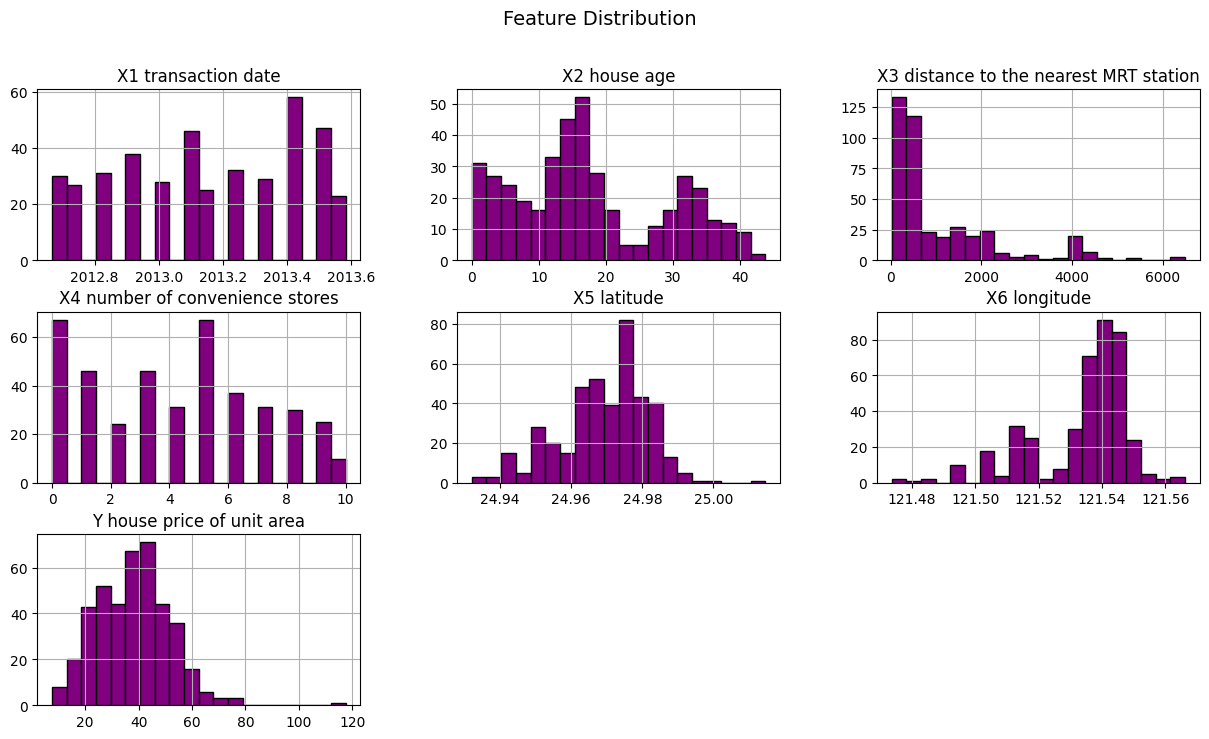

In [ ]:
df.hist(figsize = (15, 8), bins = 20, color = 'purple', edgecolor = 'black')
plt.suptitle("Feature Distribution", fontsize = 14)
plt.show()

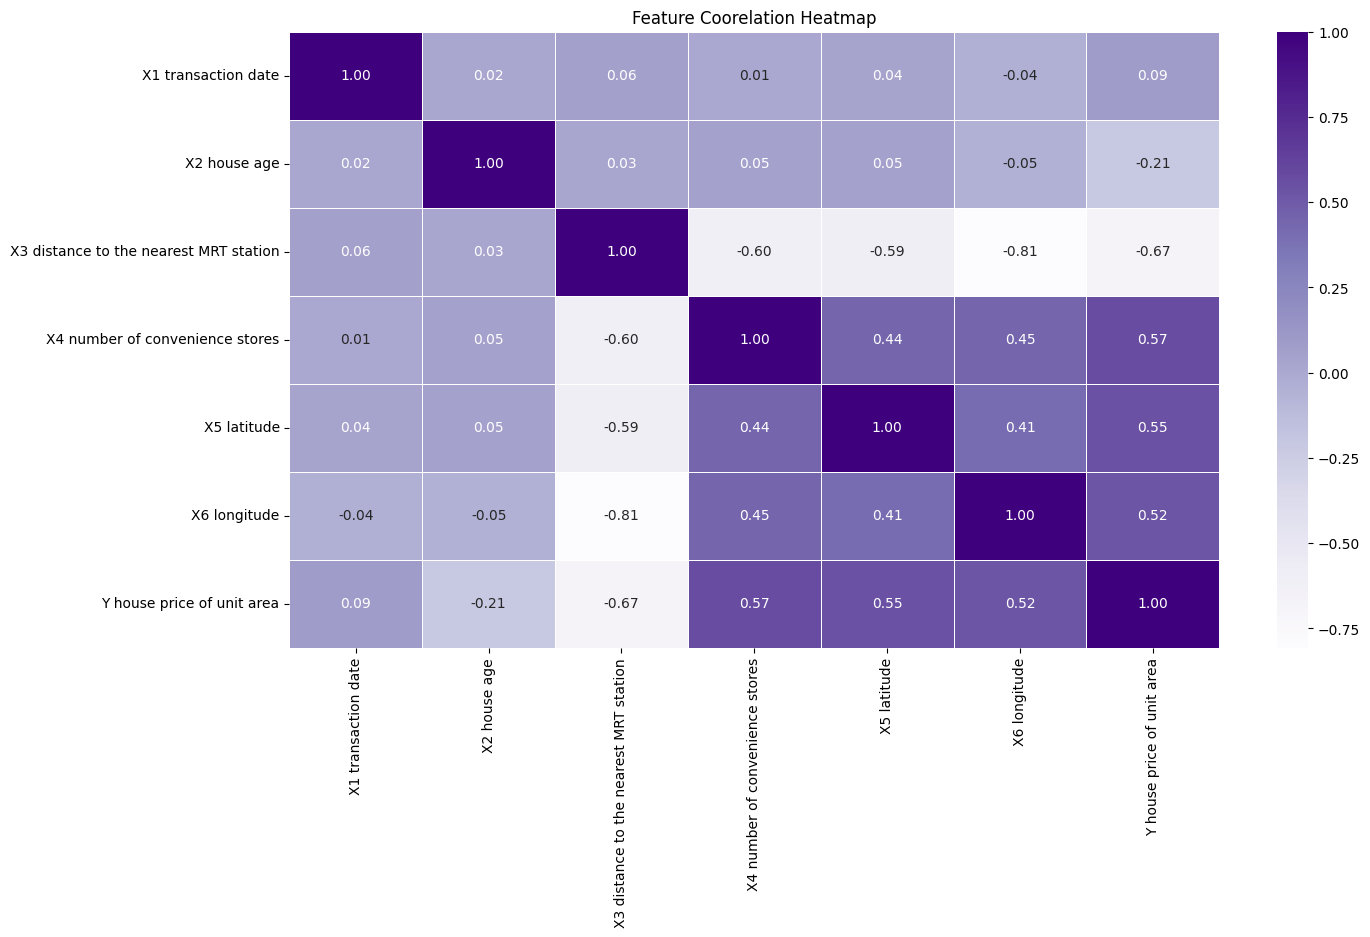

In [ ]:
plt.figure(figsize = (15, 8))
sns.heatmap(df.corr(), annot=True, cmap='Purples', fmt=".2f", linewidth = 0.5)
plt.title("Feature Coorelation Heatmap")
plt.show()

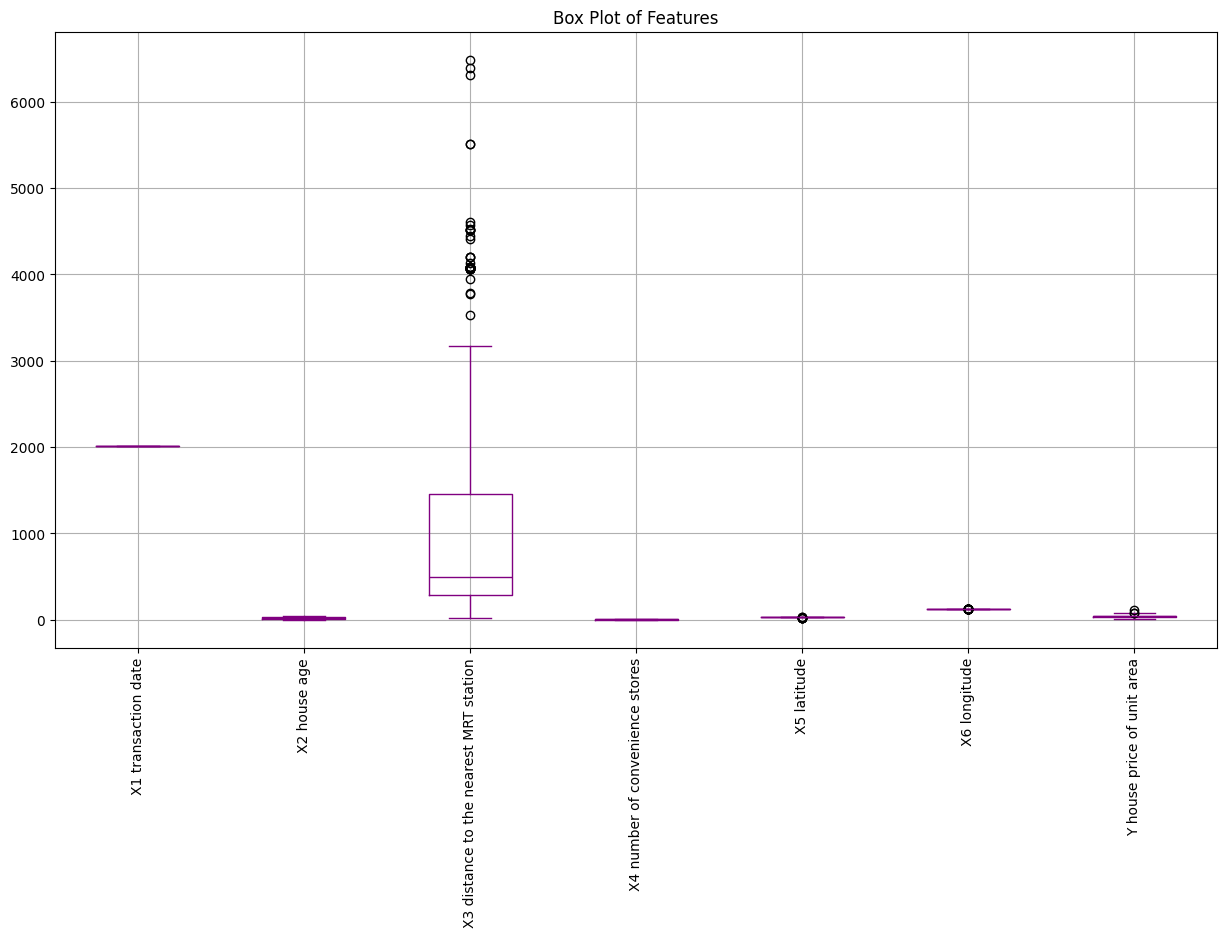

In [ ]:
#Boxplots for detecting outliers
plt.figure(figsize = (15, 8))
df.boxplot(rot = 90, color = 'purple')
plt.title("Box Plot of Features")
plt.show()

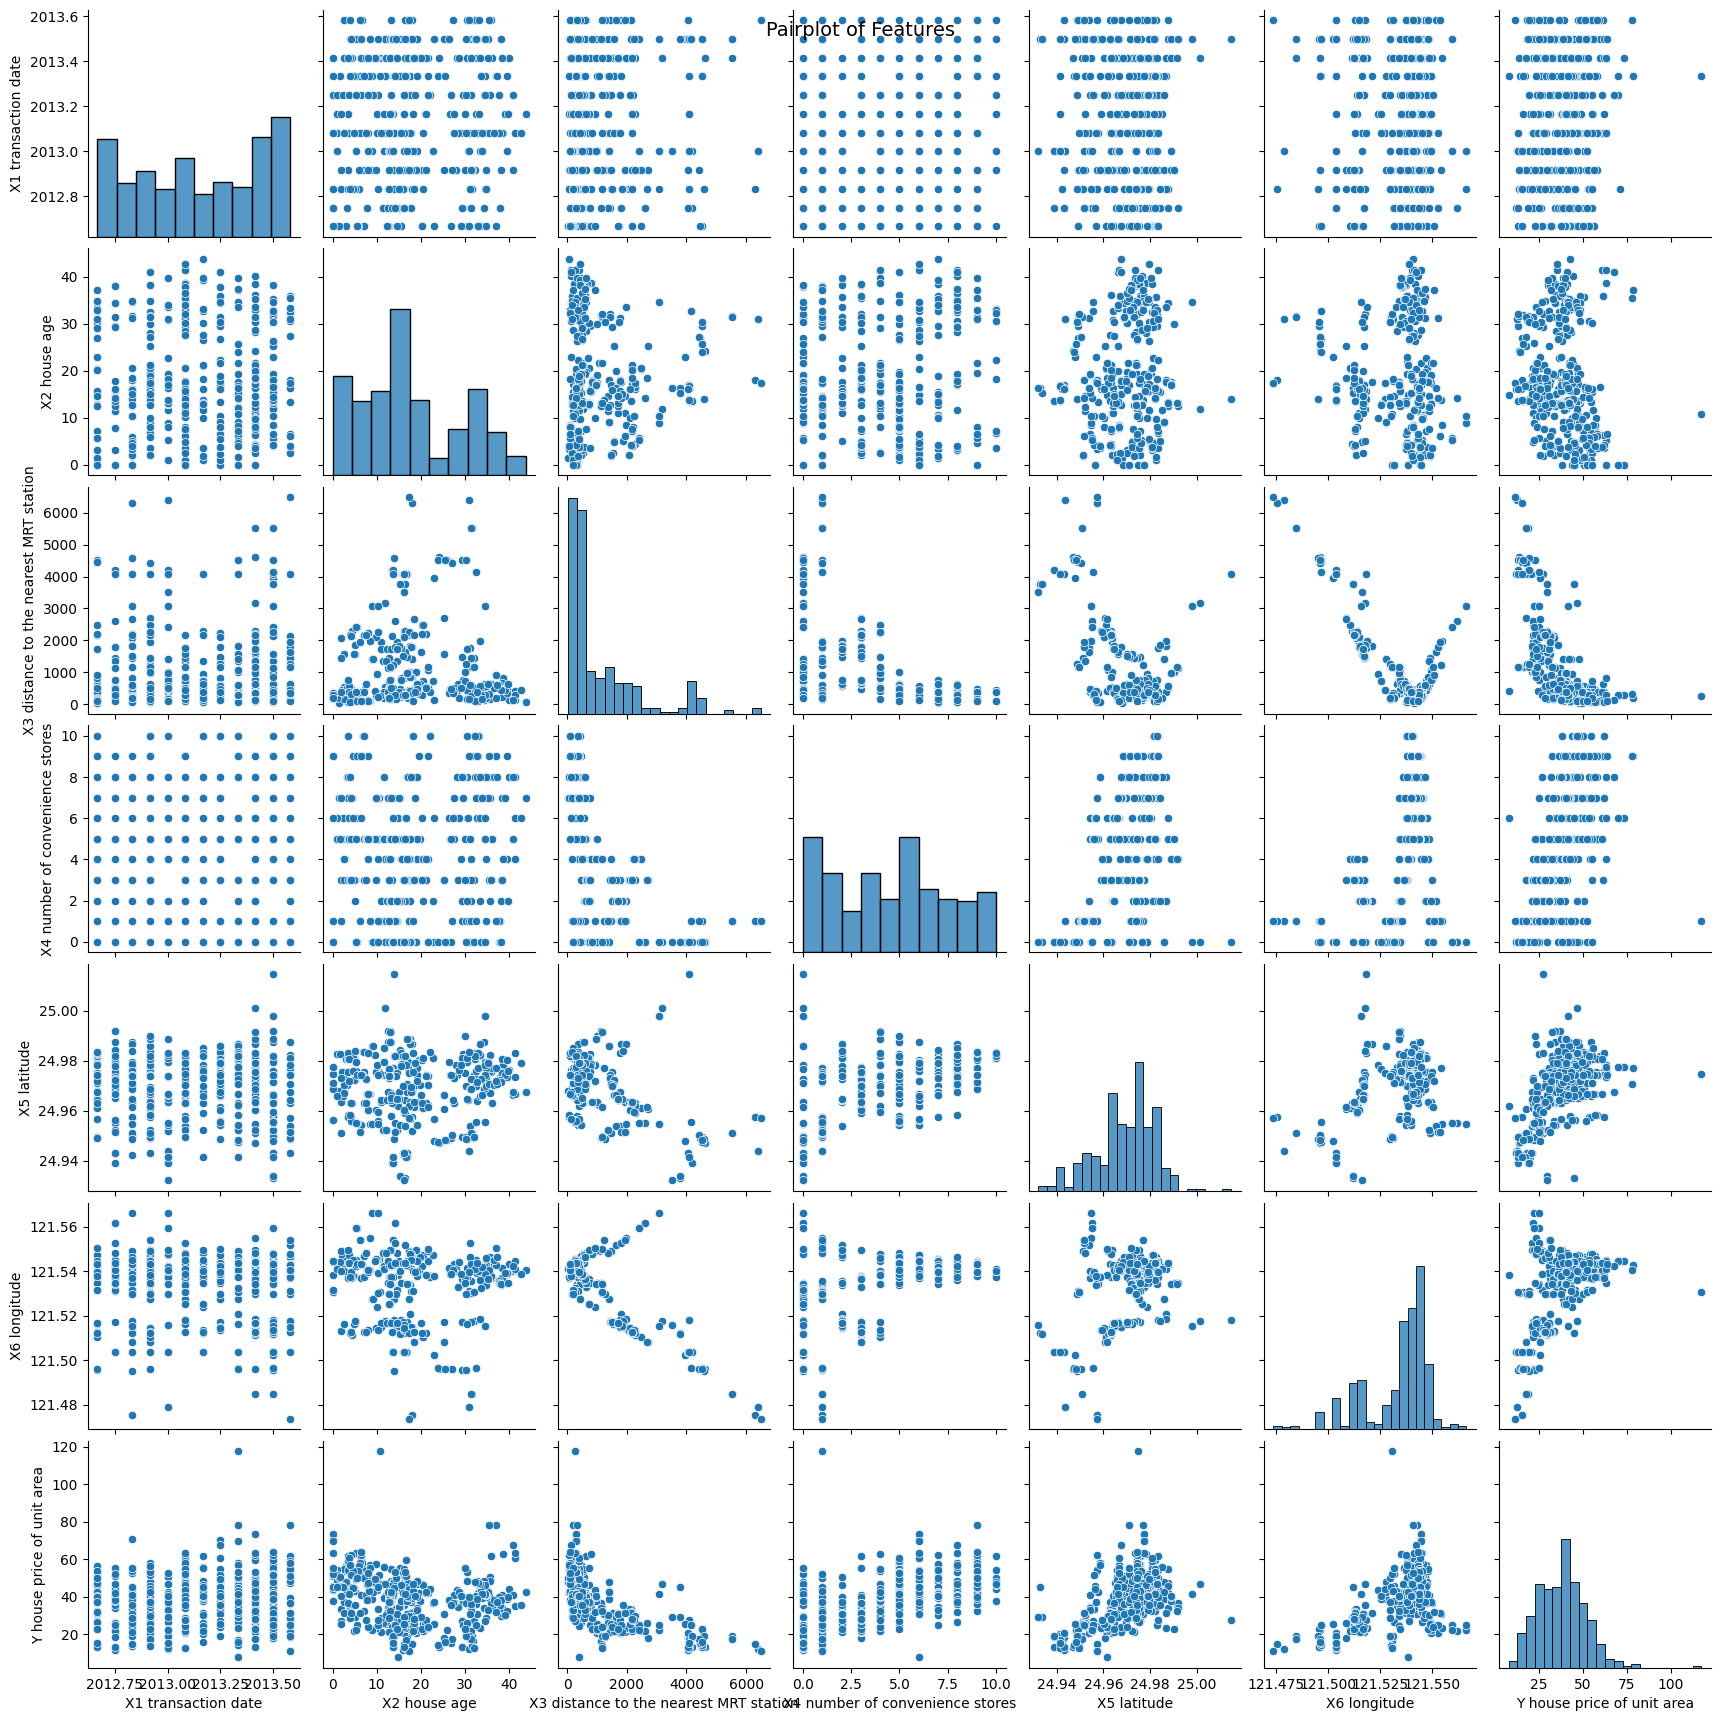

In [ ]:
sns.pairplot(df)
plt.suptitle("Pairplot of Features", fontsize = 14)
plt.show()

#**Model from Scratch**

Training MSE: 82.9668, Training R²: 0.5586
Testing MSE: 53.6888, Testing R²: 0.6814


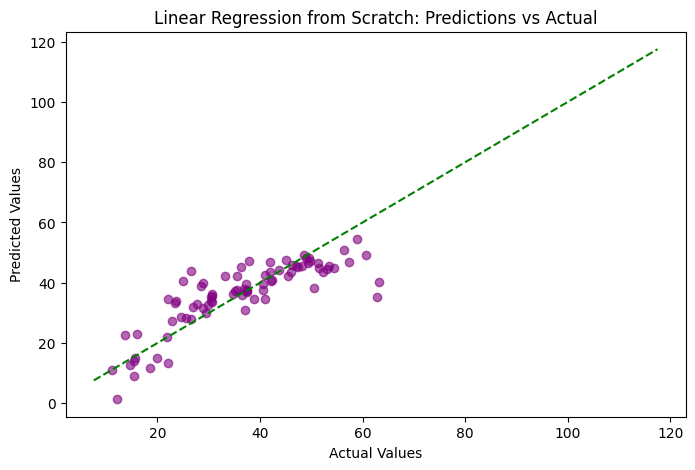

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define features (X) and target variable (y)
X = df.drop(columns=['Y house price of unit area']).values  # Convert to numpy array
y = df['Y house price of unit area'].values

# Manually split dataset into training and testing sets (80-20 split)
def train_test_split_manual(X, y, test_size=0.2, seed=42):
    np.random.seed(seed)
    indices = np.arange(len(y))
    np.random.shuffle(indices)

    test_size = int(len(y) * test_size)
    test_indices = indices[:test_size]
    train_indices = indices[test_size:]

    return X[train_indices], X[test_indices], y[train_indices], y[test_indices]

X_train, X_test, y_train, y_test = train_test_split_manual(X, y)

# Manually standardize features
def standardize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    return (X - mean) / std, mean, std

X_train_scaled, mean, std = standardize(X_train)
X_test_scaled = (X_test - mean) / std

# Add bias term (intercept)
X_train_scaled = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled]
X_test_scaled = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled]

# Initialize parameters (weights)
n_features = X_train_scaled.shape[1]
weights = np.zeros(n_features)

# Define hyperparameters
learning_rate = 0.01
epochs = 1000
m = len(y_train)

# Gradient Descent
for epoch in range(epochs):
    y_pred = np.dot(X_train_scaled, weights)
    error = y_pred - y_train

    gradients = (1/m) * np.dot(X_train_scaled.T, error)
    weights -= learning_rate * gradients

# Make predictions
y_train_pred = np.dot(X_train_scaled, weights)
y_test_pred = np.dot(X_test_scaled, weights)

# Compute MSE manually
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Compute R² manually
def r2_score_manual(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    return 1 - (ss_residual / ss_total)

# Print Evaluation Metrics
print(f"Training MSE: {mse(y_train, y_train_pred):.4f}, Training R²: {r2_score_manual(y_train, y_train_pred):.4f}")
print(f"Testing MSE: {mse(y_test, y_test_pred):.4f}, Testing R²: {r2_score_manual(y_test, y_test_pred):.4f}")

# Plot Predictions vs Actual Values
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_test_pred, color='Purple', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='Green', linestyle='--')  # Identity line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression from Scratch: Predictions vs Actual")
plt.show()

#**Primary Model**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor



# Define features (X) and target variable (y)
X = df.drop(columns=['Y house price of unit area'])
y = df['Y house price of unit area']

# Split dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (not necessary for tree-based models like RandomForest, but good for Linear Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
linear_reg = LinearRegression()
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)

# Train models
linear_reg.fit(X_train_scaled, y_train)
rf_reg.fit(X_train, y_train)  # Random Forest doesn't need scaling

# Make predictions
y_pred_lr = linear_reg.predict(X_test_scaled)
y_pred_rf = rf_reg.predict(X_test)

# Evaluate models
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Performance:")
    print(f"  - Mean Absolute Error (MAE): {mae:.4f}")
    print(f"  - Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"  - R-squared (R²): {r2:.4f}\n")
    return r2

r2_lr = evaluate_model(y_test, y_pred_lr, "Linear Regression")
r2_rf = evaluate_model(y_test, y_pred_rf, "Random Forest Regression")

# Identify best model
best_model = "Random Forest" if r2_rf > r2_lr else "Linear Regression"
print(f"Best Model: {best_model}")

Linear Regression Performance:
  - Mean Absolute Error (MAE): 5.3054
  - Root Mean Squared Error (RMSE): 7.3148
  - R-squared (R²): 0.6811

Random Forest Regression Performance:
  - Mean Absolute Error (MAE): 3.9597
  - Root Mean Squared Error (RMSE): 5.6931
  - R-squared (R²): 0.8068

Best Model: Random Forest


#**Hyper-parameter Optimization**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Define features (X) and target variable (y)
X = df.drop(columns=['Y house price of unit area'])  # Independent variables
y = df['Y house price of unit area']  # Target variable

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ---- Hyperparameter Tuning for Ridge Regression ----
ridge_param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge = Ridge()
ridge_grid_search = GridSearchCV(ridge, ridge_param_grid, cv=5, scoring='r2', n_jobs=-1)
ridge_grid_search.fit(X_train_scaled, y_train)

# ---- Hyperparameter Tuning for Random Forest ----
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor(random_state=42)
rf_grid_search = GridSearchCV(rf, rf_param_grid, cv=5, scoring='r2', n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

# Get best parameters and best scores
best_ridge_params = ridge_grid_search.best_params_
best_ridge_score = ridge_grid_search.best_score_

best_rf_params = rf_grid_search.best_params_
best_rf_score = rf_grid_search.best_score_

# Print results
print("Best Hyperparameters for Ridge Regression:", best_ridge_params)
print("Best R² Score for Ridge Regression:", best_ridge_score)

print("Best Hyperparameters for Random Forest:", best_rf_params)
print("Best R² Score for Random Forest:", best_rf_score)

Best Hyperparameters for Ridge Regression: {'alpha': 10}
Best R² Score for Ridge Regression: 0.5407253982765964
Best Hyperparameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Best R² Score for Random Forest: 0.6622567082333354


#**Feature Selection**

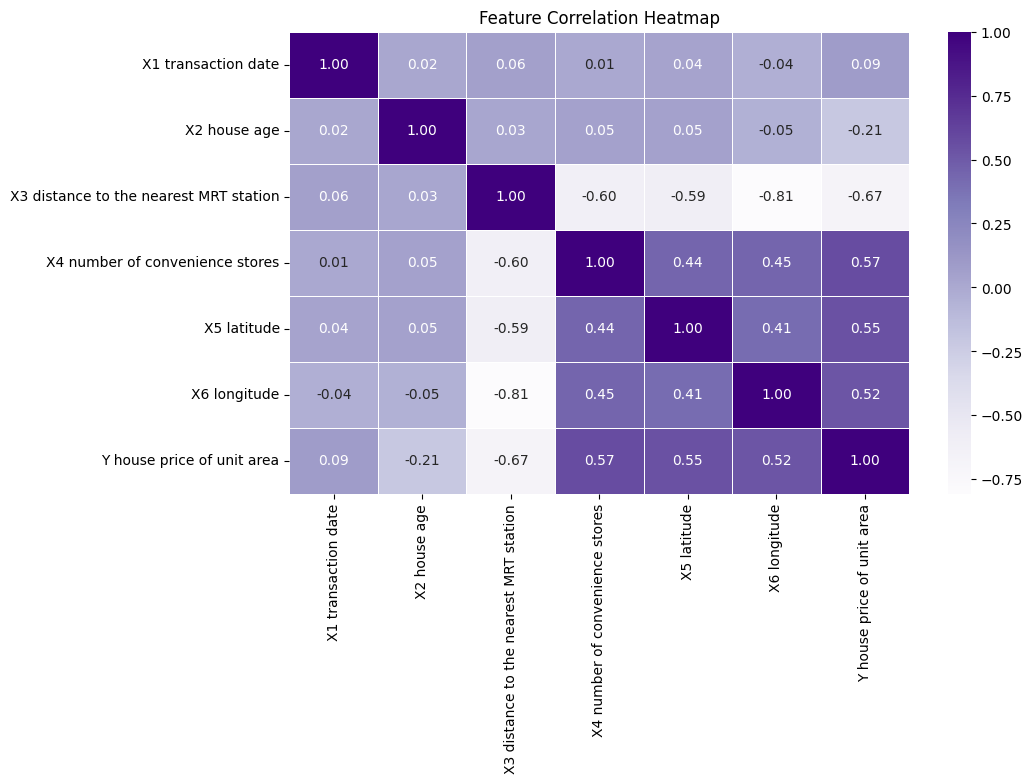

Important Features:
 Y house price of unit area                1.000000
X3 distance to the nearest MRT station    0.673613
X4 number of convenience stores           0.571005
X5 latitude                               0.546307
X6 longitude                              0.523287
X2 house age                              0.210567
X1 transaction date                       0.087491
Name: Y house price of unit area, dtype: float64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# Compute correlation matrix
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap='Purples', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Select features with strong correlation (absolute correlation > 0.3)
important_features = correlation_matrix["Y house price of unit area"].abs().sort_values(ascending=False)
print("Important Features:\n", important_features)

#**Final Model**


 Optimized Linear Regression Performance:
  - Train MAE: 6.3902 | Test MAE: 5.3501
  - Train RMSE: 9.2430 | Test RMSE: 7.3879
  - Train R²: 0.5458 | Test R²: 0.6746

 Optimized Random Forest Performance:
  - Train MAE: 2.9664 | Test MAE: 3.9660
  - Train RMSE: 4.8151 | Test RMSE: 5.7191
  - Train R²: 0.8767 | Test R²: 0.8050


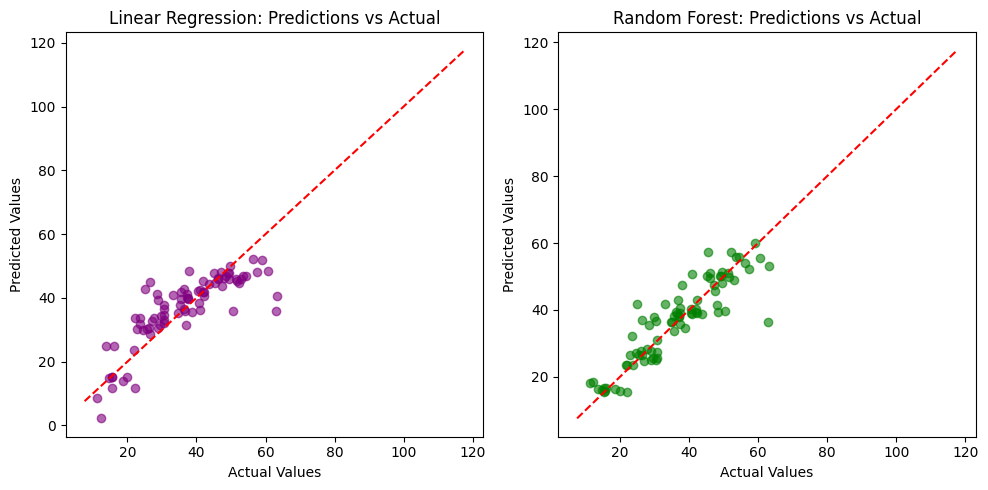

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
df = pd.read_csv('UCI_RealEstateValuation.csv')

# Replace with your actual selected features after feature selection
selected_features = ['X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude', 'X2 house age']
X = df[selected_features]
y = df["Y house price of unit area"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_train_pred_lin = lin_reg.predict(X_train)
y_test_pred_lin = lin_reg.predict(X_test)

# Train Random Forest with best hyperparameters
best_rf_params = {'n_estimators': 150, 'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 2}
rf_reg = RandomForestRegressor(**best_rf_params, random_state=42)
rf_reg.fit(X_train, y_train)
y_train_pred_rf = rf_reg.predict(X_train)
y_test_pred_rf = rf_reg.predict(X_test)

# Function to evaluate models
def evaluate_model(y_train, y_train_pred, y_test, y_test_pred, model_name):
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    print(f"\n {model_name} Performance:")
    print(f"  - Train MAE: {train_mae:.4f} | Test MAE: {test_mae:.4f}")
    print(f"  - Train RMSE: {train_rmse:.4f} | Test RMSE: {test_rmse:.4f}")
    print(f"  - Train R²: {train_r2:.4f} | Test R²: {test_r2:.4f}")

# Evaluate both models
evaluate_model(y_train, y_train_pred_lin, y_test, y_test_pred_lin, "Optimized Linear Regression")
evaluate_model(y_train, y_train_pred_rf, y_test, y_test_pred_rf, "Optimized Random Forest")

# Plot predictions vs actual values
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_test_pred_lin, color='purple', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression: Predictions vs Actual")

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred_rf, color='green', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest: Predictions vs Actual")

plt.tight_layout()
plt.show()

**CONCLUSION**

The two models—Linear Regression and Random Forest Regression—were trained and evaluated using key performance metrics:

**Optimized Linear Regression Performance:**
  - Train MAE: 6.3902 | Test MAE: 5.3501
  - Train RMSE: 9.2430 | Test RMSE: 7.3879
  - Train R²: 0.5458 | Test R²: 0.6746

**Optimized Random Forest Performance:**
  - Train MAE: 2.9664 | Test MAE: 3.9660
  - Train RMSE: 4.8151 | Test RMSE: 5.7191
  - Train R²: 0.8767 | Test R²: 0.8050

From the results, Random Forest Regression outperformed Linear Regression, achieving a higher R² value (0.8050 vs. 0.6746) and lower error values (MAE & RMSE). This suggests that Random Forest captured non-linear relationships in the dataset better than Linear Regression.


Cross-Validation & Hyperparameter Tuning: Using GridSearchCV for hyperparameter tuning significantly improved Random Forest’s performance by selecting optimal values for n_estimators, max_depth, min_samples_split, and min_samples_leaf. This resulted in a more generalized model with reduced overfitting.
Feature Selection: Selecting only the most relevant features improved model efficiency by reducing noise and improving interpretability. This helped avoid overfitting and led to better generalization on unseen data.
Overall, these techniques contributed to reducing error and improving model accuracy.

Random Forest is a better choice for this dataset due to its ability to capture complex patterns.Linear Regression performed decently, but it was limited by its assumption of a linear relationship.Feature selection was crucial in reducing unnecessary complexity and improving model performance.Random Forest Regression is the best-performing model, achieving the highest accuracy and lowest error. Future work can explore more advanced techniques to further optimize performance.